# The Spark Foundation

## Data Science And Bussiness Analytics(Task- 4)

### Prediction using Decision Tree Algorithm
####  Author : Shivam Kumar
 - Performing Decision Tree Classifier and Visualize it graphically on Irish Dataset.
 - The purpose of this task is if we feed any new data to this classifier, it would be able to      predict the right class accordingly.
 - Dataset :- https://bit.ly/3kXTdox

## Importing Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [79]:
df = pd.read_csv('iris.csv')
print("Data imported successfully.")

Data imported successfully.


In [27]:
df.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [28]:
pd.DataFrame(df.shape,index=['Row','Column'],columns=[1])# checking shape of the data

,1
Row,150
Column,5


 - There are 150 Rows and 5 Columns present in this Dataset.

### Checking Duplicate value

In [29]:
df.duplicated().sum()

1

 - There are 1 Duplicate value present in this Dataset.

In [30]:
#Droping the Duplicate Value
df.drop_duplicates(keep="first",inplace=True)

In [31]:
df.duplicated().sum()

0

### Statistical information

In [33]:
df.describe()

,sepal.length,sepal.width,petal.length,petal.width
count,149.000000,149.000000,149.000000,149.000000
mean,5.843624,3.059732,3.748993,1.194631
std,0.830851,0.436342,1.767791,0.762622
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.300000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


### Columns And Their Data Types

In [34]:
df.dtypes.to_frame('Data type')

,Data type
sepal.length,float64
sepal.width,float64
petal.length,float64
petal.width,float64
variety,object


### Checking Missing Value

In [36]:
df.isnull().sum().to_frame('Missing_Count')

,Missing_Count
sepal.length,0
sepal.width,0
petal.length,0
petal.width,0
variety,0


 - There are no Missing Valie Present in the dataset.

### Correlation in Dataset

In [41]:
df.corr()

,sepal.length,sepal.width,petal.length,petal.width
sepal.length,1.000000,-0.118129,0.873738,0.820620
sepal.width,-0.118129,1.000000,-0.426028,-0.362894
petal.length,0.873738,-0.426028,1.000000,0.962772
petal.width,0.820620,-0.362894,0.962772,1.000000


### Ploting and Mapping Corrrelation in Dataset

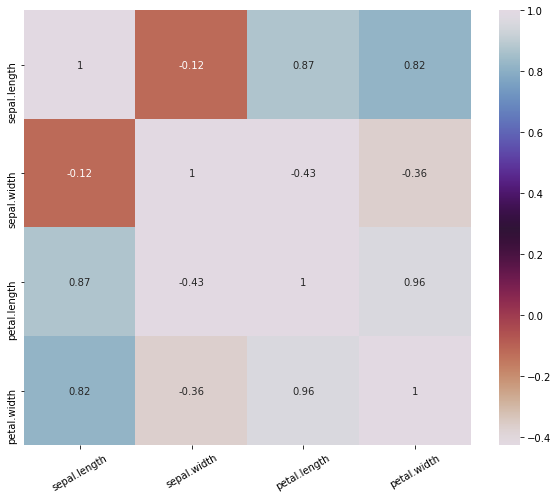

In [46]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),annot=True,cmap='twilight_r')
plt.xticks(rotation=30)
plt.show()

 - As we can see from above strong correlation between PetalLength with PetalWidth and SepalLength.
 - Also SepalLength is also highly correlated with PetalWidth

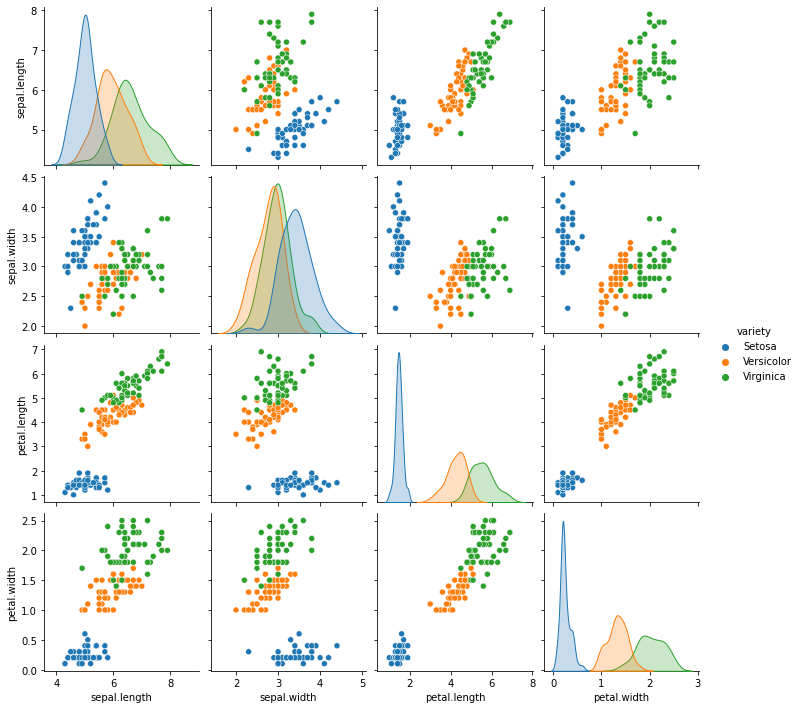

In [49]:
sns.pairplot(df, hue = 'variety')
plt.show()

## Preparing the Data

### Seperating Independent and Dependent variable

In [50]:
X=df.drop('variety',axis=1)
y=df['variety']

### Spliting data into train and test

In [51]:
from sklearn.model_selection import train_test_split

In [52]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=1)

### Shape of Train and Test

In [53]:
print("X_train :",X_train.shape)
print("X_test :",X_test.shape)
print("y_train :",y_train.shape)
print("y_test :",y_test.shape)

X_train : (104, 4)
X_test : (45, 4)
y_train : (104,)
y_test : (45,)


## Training the Algorithm

In [54]:
from sklearn.tree import DecisionTreeClassifier

In [55]:
dtc=DecisionTreeClassifier()
dtc.fit(X_train,y_train)

print("Training complete.")

Training complete.


In [77]:
pred=dtc.predict(X_test)
print("Test Predictions are: ",pred)

Test Predictions are:  ['Virginica' 'Versicolor' 'Versicolor' 'Virginica' 'Versicolor'
 'Virginica' 'Versicolor' 'Versicolor' 'Setosa' 'Versicolor' 'Setosa'
 'Setosa' 'Versicolor' 'Setosa' 'Versicolor' 'Setosa' 'Versicolor'
 'Setosa' 'Versicolor' 'Setosa' 'Versicolor' 'Virginica' 'Setosa'
 'Virginica' 'Virginica' 'Setosa' 'Versicolor' 'Setosa' 'Versicolor'
 'Virginica' 'Virginica' 'Versicolor' 'Setosa' 'Virginica' 'Setosa'
 'Setosa' 'Virginica' 'Virginica' 'Setosa' 'Virginica' 'Virginica'
 'Versicolor' 'Versicolor' 'Setosa' 'Setosa']


## Classification Report

In [71]:
from sklearn.metrics import accuracy_score,classification_report
from sklearn.metrics import confusion_matrix
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

      Setosa       1.00      1.00      1.00        16
  Versicolor       0.94      0.94      0.94        16
   Virginica       0.92      0.92      0.92        13

    accuracy                           0.96        45
   macro avg       0.95      0.95      0.95        45
weighted avg       0.96      0.96      0.96        45



## Confusion Matrix

In [72]:
confusion_matrix(y_test, pred)

array([[16,  0,  0],
       [ 0, 15,  1],
       [ 0,  1, 12]], dtype=int64)

## Accuracy of Model

In [73]:
from sklearn import metrics
print('Accuracy Score:', metrics.accuracy_score(y_test, pred))

Accuracy Score: 0.9555555555555556


In [75]:
# Comparing the test predictions with original values
comapred_data = pd.DataFrame({"Actual":y_test,"Prediction":pred})

In [76]:
comapred_data

,Actual,Prediction
146,Virginica,Virginica
89,Versicolor,Versicolor
54,Versicolor,Versicolor
77,Versicolor,Virginica
84,Versicolor,Versicolor
105,Virginica,Virginica
91,Versicolor,Versicolor
53,Versicolor,Versicolor
44,Setosa,Setosa
59,Versicolor,Versicolor


## Visualizing The Tree

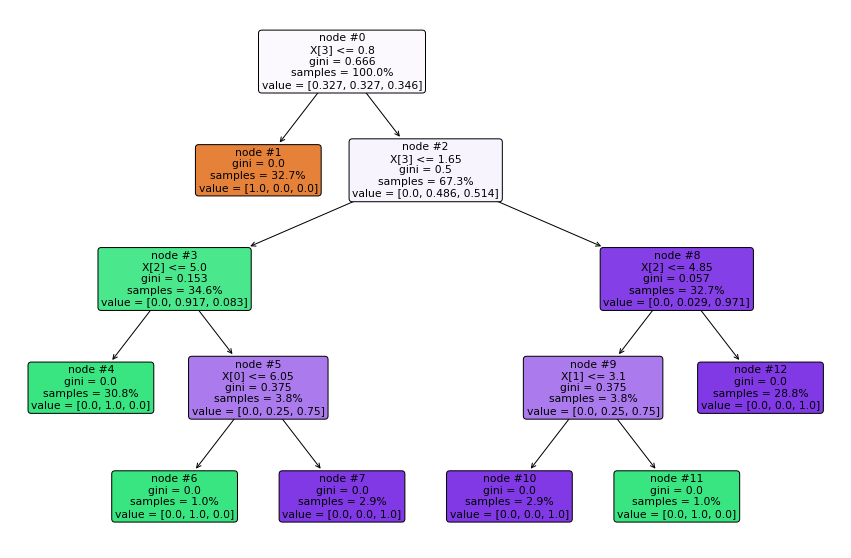

In [78]:
from sklearn import tree
plt.figure(figsize=(15,10))
tree.plot_tree(dtc,filled=True, rounded=True, proportion=True, node_ids=True)
plt.show()

##  ------------------------------------  THANK YOU ---------------------------------------